## Lab 8: Pandas III

Problem 1:

In [47]:
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt
import numpy as np

In [144]:
def plot_diamonds():
    diamonds = data("diamonds")
    clarity = diamonds.groupby("clarity")
    
    clarities = ('I1','IF','SI1','SI2','VS1','VS2','VVS1','VVS2')
    
    plt.plot()
    # collapsing values so that a clean line plot can be made...
    # there's got to be an easier way to do this??
    for cl in clarities:
        c = clarity.get_group(cl)
        cp_means = np.empty(30)
        for i in np.arange(0,3,0.1):
            m = c[(c['carat'] >= i) & (c['carat'] < i+0.1)]['price'].mean()
            cp_means[i*10] = m
        plt.plot(np.arange(0,3,0.1), cp_means, label=cl)
        
    plt.grid()
    plt.legend()
    plt.title("Price of Diamonds of Different Clarities and Weights")
    plt.xlabel("Diamond Weight (Carats)")
    plt.ylabel("Price (USD)")
    plt.show()
        
    
   
    
    

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


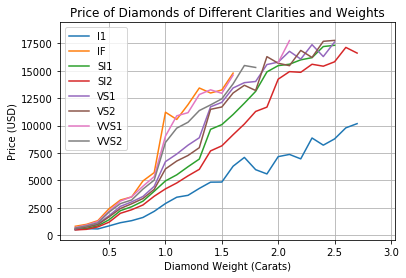

In [145]:
plot_diamonds()

Fairly straightforward figure demonstrating the difference trajectories of the different clarities of diamonds. Kept intentionally straightforward (i.e. no heat map) so that the desired relationship can be seen immediately. Each point in each line is made by averaging across diamonds in an interval of 0.1 carats. 

Problem 2:

In [195]:
def titanic():
    # cleaning data
    df = pd.read_csv('titanic.csv')
    df = df.drop(['Name','Sibsp','Parch','Cabin','Boat','Body','home.dest','Ticket'], axis=1)
    avg_age = df['Age'].mean()
    df['Age'].fillna(avg_age)
    df.dropna()
    
    surv_by_embark = df.groupby('Embarked')
    print(surv_by_embark.mean()['Survived'],'\n')
    
    print(df.pivot_table('Survived', index='Sex', columns='Embarked'),'\n')
    
    age = pd.cut(df['Age'], [0,12,18,80])
    print(df.pivot_table('Survived',index=['Sex',age],columns='Embarked',))
    print('\n The above table breaks down the survival rates for the'
          '\ndifferent embarkments by age as well as sex.')
    
    print(df.pivot_table('Survived',index=['Sex',age],columns='Embarked',
         aggfunc='count'))
    

In [196]:
titanic()

Embarked
C    0.555556
Q    0.357724
S    0.332604
Name: Survived, dtype: float64 

Embarked         C         Q         S
Sex                                   
female    0.902655  0.616667  0.680412
male      0.305732  0.111111  0.170144 

Embarked                C         Q         S
Sex    Age                                   
female (0, 12]   0.888889       NaN  0.542857
       (12, 18]  0.800000  0.500000  0.777778
       (18, 80]  0.959459  0.444444  0.732673
male   (0, 12]   0.714286  0.000000  0.578947
       (12, 18]  0.333333       NaN  0.066667
       (18, 80]  0.336634  0.095238  0.154023

 The above table breaks down the survival rates for the
different embarkments by age as well as sex.
Embarked             C     Q      S
Sex    Age                         
female (0, 12]     9.0   NaN   35.0
       (12, 18]   15.0   6.0   27.0
       (18, 80]   74.0  18.0  202.0
male   (0, 12]     7.0   5.0   38.0
       (12, 18]    6.0   NaN   45.0
       (18, 80]  101.0  21.0  435.0
